# Coleta de Dados

### https://www.kaggle.com/datasets/shaz13/real-world-documents-collections

In [1]:
import pandas as pd
import os

In [2]:
from typing import List

from ETL_download_dataset_kaggle import download_dataset, unzip_file
from ETL_process_image import process_dataset, draw_bounding_boxes

path_dataset = "./dataset/real_world_documents_collections/docs-sm"
all_folders = ['invoice', 'file_folder', 'memo', 'specification', 'letter', 'scientific_publication', 'scientific_report', 'budget', 'resume', 'handwritten', 'questionnaire', 'form', 'email', 'advertisement', 'presentation', 'news_article']
required_folders = ['form', 'resume', 'letter', 'invoice', 'questionnaire']

def etl_for_dataframe(path_dataset: str, required_folders: List[str]) -> pd.DataFrame:
    """
    Gerencia o fluxo de download e descompactação do dataset.
    Extrai textos das imagens
    Prepara textos para serem usado pela ML
    """
    zip_file = 'real-world-documents-collections.zip'
    extract_to = 'dataset/real_world_documents_collections'
    link_dataset = 'shaz13/real-world-documents-collections'
    if not os.path.exists(zip_file):
        # Baixar o dataset
        download_dataset(link_dataset)
        # descompacta arquivo ZIP
        unzip_file(zip_file, extract_to)
    path_df_parquet = './DF_shaz13_real_world_documents_collections.parquet'
    
    # TODO: 
    # required_folders = ['form']
    df = process_dataset(path_dataset, path_df_parquet, required_folders)
    return df

df = etl_for_dataframe(path_dataset, required_folders)


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Análise Exploratória de Dados (EDA)

In [3]:
df.shape

(1569, 4)

In [4]:
df.head(20)

,text,class_img,name,dict_ocr
0,bellomycarrigginc job university parkway aa ex...,questionnaire,505527865_505527879.jpg,"{'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2..."
1,inc broadway york screening questionnatre time...,questionnaire,89583564_89583573.jpg,"{'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1..."
2,,questionnaire,503543120_503543128.jpg,"{'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3..."
3,alan november account smoking manufacture desc...,questionnaire,501525861.jpg,"{'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2..."
4,ob tor old,questionnaire,71224770.jpg,"{'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3..."
5,,questionnaire,504995600.jpg,"{'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3..."
6,alpha recognition threshold attribute profile ...,questionnaire,506389262.jpg,"{'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2..."
7,bmg,questionnaire,0060197826.jpg,"{'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3..."
8,recruitment questionnaire approach year old me...,questionnaire,2500145200_2500145210.jpg,"{'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1..."
9,consumer relation winstonsalem n c frank mayhe...,questionnaire,522749435+-9436.jpg,"{'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3..."


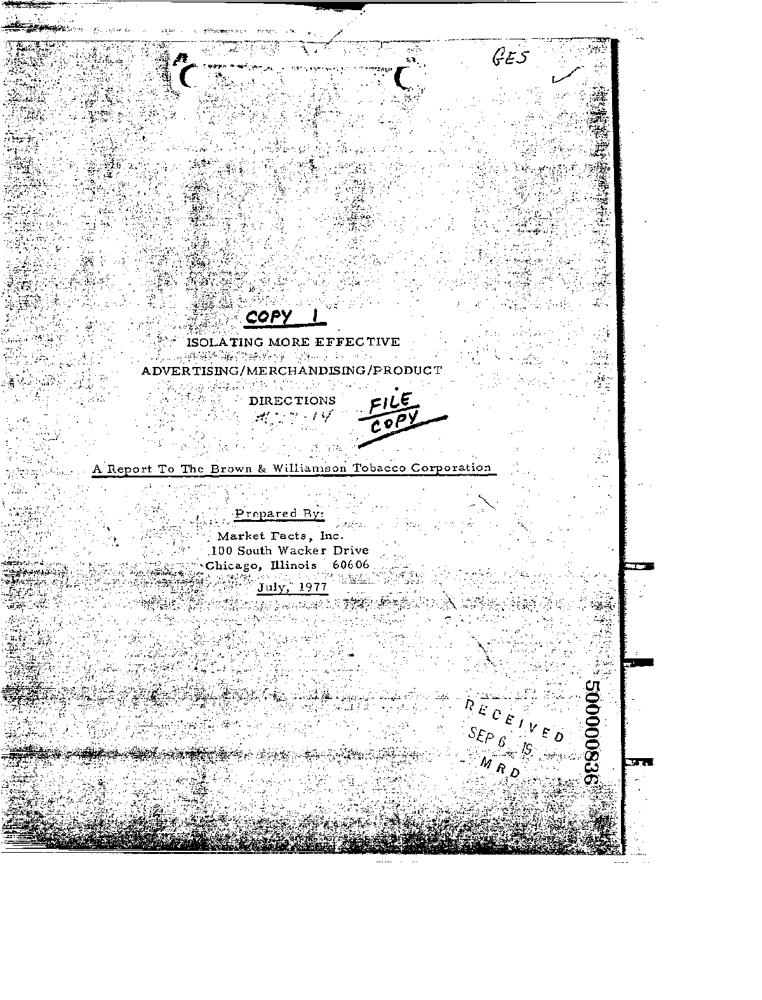

In [6]:
from PIL import Image
class_img = 'questionnaire'
name_img = '0000002206.jpg'
image = Image.open(f"{path_dataset}/{class_img}/{name_img}")
image

In [7]:
# Usar query para filtrar e iloc para pegar a primeira linha
filtered_row = df.query("class_img == @class_img and name == @name_img").iloc[0]
filtered_row

text         isolating effective market inc south wacker drive
class_img                                        questionnaire
name                                            0000002206.jpg
dict_ocr     {'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
Name: 180, dtype: object

In [9]:
# obtem a linha do DF onde essa imagem foi processada
ocr_df = pd.DataFrame(filtered_row['dict_ocr'])
ocr_df.columns

Index(['block_num', 'conf', 'height', 'left', 'level', 'line_num', 'page_num',
       'par_num', 'text', 'top', 'width', 'word_num'],
      dtype='object')

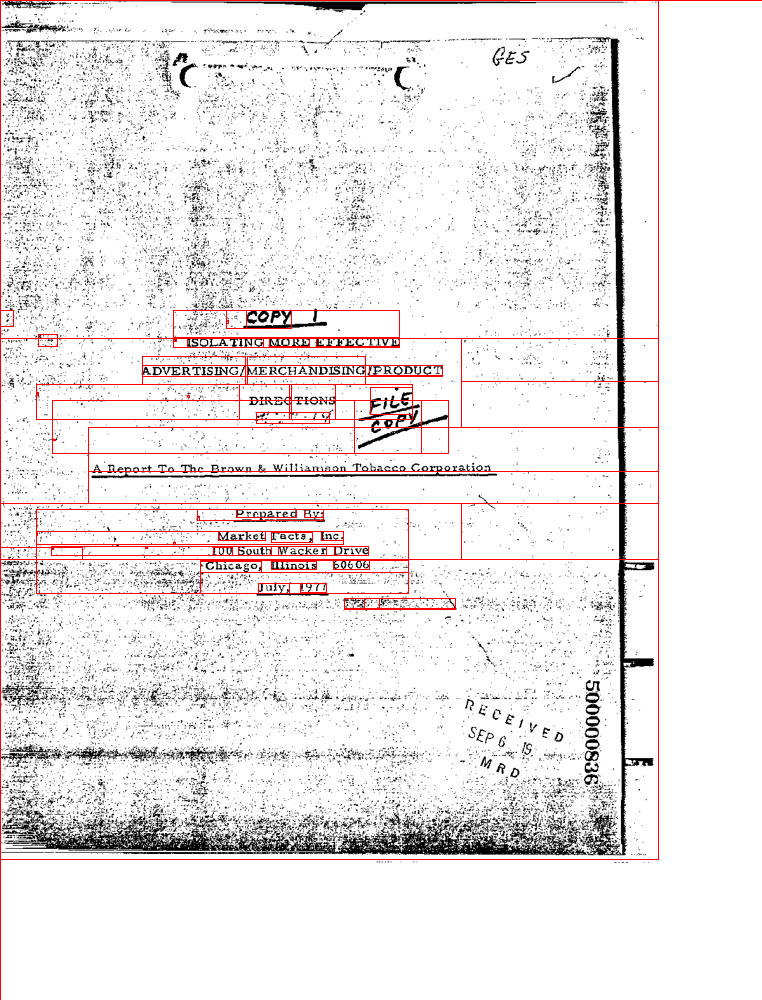

In [10]:
# 
image = draw_bounding_boxes(image, ocr_df)
image

# Separando os dados em treino e teste

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class_img'], test_size=0.2, random_state=42)

### Vetorizando dos dados

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Configurando o TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(2,5), max_df=0.95, min_df=2 ,max_features=10000)

In [14]:
# Ajustando e transformando os dados de treinamento
tfidf_train = tfidf.fit_transform(X_train)
# Convertendo a matriz esparsa em uma matriz densa
tfidf_test = tfidf.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Lista de modelos para comparar
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Ajuste de hiperparâmetros usando GridSearchCV

busca pela configuração ideal de parâmetros para cada modelo.

Definição de param_grids: Para cada modelo, definimos um dicionário de param_grid que contém os parâmetros que desejamos ajustar utilizando GridSearchCV. Os parâmetros específicos foram escolhidos com base na prática comum e podem ser ajustados conforme necessário.

Loop de Ajuste de Parâmetros: Iteramos sobre o dicionário models, que contém os modelos a serem testados. Para cada modelo, realizamos o ajuste de hiperparâmetros usando GridSearchCV.

GridSearchCV: Criamos um objeto GridSearchCV para cada modelo, onde especificamos o modelo, o param_grid correspondente, o número de folds para validação cruzada (cv=5 neste exemplo) e a métrica de avaliação (scoring='accuracy').

Execução da Busca em Grade: Chamamos o método fit() para executar a busca em grade no conjunto de treinamento (tfidf_train, y_train).

Armazenamento do Melhor Modelo: Após a busca em grade, armazenamos o melhor modelo encontrado (best_estimator_) no dicionário best_models.

Avaliação no Conjunto de Teste: Finalmente, avaliamos os melhores modelos encontrados no conjunto de teste (tfidf_test, y_test) e exibimos a acurácia para cada modelo.

In [16]:
# baseado nos melhores parâmetros encontrados
param_grid_lr = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2]
}

param_grid_svc = {
    'C': [1.0],
    'kernel': ['linear'],
    'gamma': ['scale']
}

param_grid_nb = {
    'alpha': [0.1],
    'fit_prior': [True]
}

param_grid_knn = {
    'n_neighbors': [10],
    'weights': ['uniform'],
    'metric': ['euclidean']
}

param_grid_gb = {
    'n_estimators': [200],
    'learning_rate': [0.5],
    'max_depth': [10]
}

In [17]:
from sklearn.model_selection import GridSearchCV

# Definir os primeiros parâmetros para começar a testar em cada modelo
param_grid_lr = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_svc = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.5],
    'max_depth': [3, 5, 10]
}

# Dicionário de param_grids para cada modelo
param_grids = {
    'Logistic Regression': param_grid_lr,
    'Random Forest': param_grid_rf,
    'SVM': param_grid_svc,
    'Naive Bayes': param_grid_nb,
    'KNN': param_grid_knn,
    'Gradient Boosting': param_grid_gb
}

# Lista para armazenar os melhores modelos ajustados
best_models = {}

# Executar GridSearchCV para cada modelo
for name, model in models.items():
    print(f"Ajustando hiperparâmetros para {name} ...")
    # Definir o param_grid específico para o modelo atual
    param_grid: dict = param_grids[name]
    # Criar o objeto GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    # Executar a busca em grade no conjunto de treinamento
    grid_search.fit(tfidf_train, y_train)    
    # Armazenar o melhor modelo ajustado
    best_models[name] = grid_search.best_estimator_
    # Mostrar os melhores parâmetros encontrados
    print(f"Melhores parâmetros encontrados para {name}:")
    print(grid_search.best_params_)
    print()

# Avaliar os melhores modelos no conjunto de teste e mostrar métricas
print("\nAvaliação dos melhores modelos no conjunto de teste:")

for name, model in best_models.items():
    # Avaliar o modelo no conjunto de teste
    accuracy = model.score(tfidf_test, y_test)
    print(f'{name}: Acurácia no teste = {accuracy:.4f}')


Ajustando hiperparâmetros para Logistic Regression ...


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Melhores parâmetros encontrados para Logistic Regression:
{'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}

Ajustando hiperparâmetros para Random Forest ...
Melhores parâmetros encontrados para Random Forest:
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}

Ajustando hiperparâmetros para SVM ...
Melhores parâmetros encontrados para SVM:
{'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}

Ajustando hiperparâmetros para Naive Bayes ...
Melhores parâmetros encontrados para Naive Bayes:
{'alpha': 0.1, 'fit_prior': False}

Ajustando hiperparâmetros para KNN ...


/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
   

Melhores parâmetros encontrados para KNN:
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

Ajustando hiperparâmetros para Gradient Boosting ...
Melhores parâmetros encontrados para Gradient Boosting:
{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}


Avaliação dos melhores modelos no conjunto de teste:
Logistic Regression: Acurácia no teste = 0.6847
Random Forest: Acurácia no teste = 0.6688
SVM: Acurácia no teste = 0.6592
Naive Bayes: Acurácia no teste = 0.6879
KNN: Acurácia no teste = 0.3121
Gradient Boosting: Acurácia no teste = 0.6401
